### EDA and Feature Engineering of Google PlayStore Dataset



In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings



In [37]:
df = pd.read_csv(r'C:\Users\Nitin Flavier\Desktop\Data Nexus\Data Science\ML_BootCamp\Feature_Engineering\EDA\Datasets\googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [38]:
print(df.shape)
print(df.info())
print(df.describe())

(10841, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None
            Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25%       4.000000
50%       4.300000
75%       4.5

In [39]:
# missing values
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [40]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [41]:
# it checks whether all the characters are digits only or not ?
df['Reviews'].str.isnumeric().sum()

10840

In [42]:
df[~df['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [43]:
df_copy = df.copy()
df_copy.drop(df_copy.index[10472],inplace=True)

In [44]:
df_copy.shape

(10840, 13)

In [45]:
df_copy[~df_copy['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [46]:
df_copy['Reviews'] = df_copy['Reviews'].astype(int)

In [47]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int32(1), object(11)
memory usage: 1.1+ MB


In [48]:
df_copy['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [49]:
df_copy['Size'] = df_copy['Size'].str.replace('M','000000').str.replace('k','000')

# this is wrong, df_copy['Size].str.replace(string,string) expects both arguments 
# (the string to replace and the replacement value) to be strings
# df_copy['Size'] = df_copy['Size'].str.replace('Varies with device',np.nan)

df_copy['Size'] = df_copy['Size'].replace('Varies with device', np.nan)

# or
# df_copy.loc[df_copy['Size'] == 'Varies with device','Size'] = np.nan


In [50]:
df_copy['Size'] = df_copy['Size'].astype(float)
df_copy['Size'].unique()

array([1.90e+07, 1.40e+07, 8.70e+00, 2.50e+07, 2.80e+00, 5.60e+00,
       2.90e+07, 3.30e+07, 3.10e+00, 2.80e+07, 1.20e+07, 2.00e+07,
       2.10e+07, 3.70e+07, 2.70e+00, 5.50e+00, 1.70e+07, 3.90e+07,
       3.10e+07, 4.20e+00, 7.00e+00, 2.30e+07, 6.00e+00, 6.10e+00,
       4.60e+00, 9.20e+00, 5.20e+00, 1.10e+07, 2.40e+07,      nan,
       9.40e+00, 1.50e+07, 1.00e+07, 1.20e+00, 2.60e+07, 8.00e+00,
       7.90e+00, 5.60e+07, 5.70e+07, 3.50e+07, 5.40e+07, 2.01e+05,
       3.60e+00, 5.70e+00, 8.60e+00, 2.40e+00, 2.70e+07, 2.50e+00,
       1.60e+07, 3.40e+00, 8.90e+00, 3.90e+00, 2.90e+00, 3.80e+07,
       3.20e+07, 5.40e+00, 1.80e+07, 1.10e+00, 2.20e+00, 4.50e+00,
       9.80e+00, 5.20e+07, 9.00e+00, 6.70e+00, 3.00e+07, 2.60e+00,
       7.10e+00, 3.70e+00, 2.20e+07, 7.40e+00, 6.40e+00, 3.20e+00,
       8.20e+00, 9.90e+00, 4.90e+00, 9.50e+00, 5.00e+00, 5.90e+00,
       1.30e+07, 7.30e+07, 6.80e+00, 3.50e+00, 4.00e+00, 2.30e+00,
       7.20e+00, 2.10e+00, 4.20e+07, 7.30e+00, 9.10e+00, 5.50e

In [51]:
print(df_copy['Installs'].unique())

df_copy['Installs'] = df_copy['Installs'].str.replace('+','').str.replace(',','')
df_copy['Installs'] = df_copy['Installs'].astype(int)

['10,000+' '500,000+' '5,000,000+' '50,000,000+' '100,000+' '50,000+'
 '1,000,000+' '10,000,000+' '5,000+' '100,000,000+' '1,000,000,000+'
 '1,000+' '500,000,000+' '50+' '100+' '500+' '10+' '1+' '5+' '0+' '0']


In [52]:
print(df['Price'].unique())

df_copy.loc[df_copy['Price'] == 'Everyone','Price'] = np.nan
df_copy['Price'] = df_copy['Price'].str.replace('$','')
df_copy['Price'] = df_copy['Price'].astype(float)

['0' '$4.99' '$3.99' '$6.99' '$1.49' '$2.99' '$7.99' '$5.99' '$3.49'
 '$1.99' '$9.99' '$7.49' '$0.99' '$9.00' '$5.49' '$10.00' '$24.99'
 '$11.99' '$79.99' '$16.99' '$14.99' '$1.00' '$29.99' '$12.99' '$2.49'
 '$10.99' '$1.50' '$19.99' '$15.99' '$33.99' '$74.99' '$39.99' '$3.95'
 '$4.49' '$1.70' '$8.99' '$2.00' '$3.88' '$25.99' '$399.99' '$17.99'
 '$400.00' '$3.02' '$1.76' '$4.84' '$4.77' '$1.61' '$2.50' '$1.59' '$6.49'
 '$1.29' '$5.00' '$13.99' '$299.99' '$379.99' '$37.99' '$18.99' '$389.99'
 '$19.90' '$8.49' '$1.75' '$14.00' '$4.85' '$46.99' '$109.99' '$154.99'
 '$3.08' '$2.59' '$4.80' '$1.96' '$19.40' '$3.90' '$4.59' '$15.46' '$3.04'
 '$4.29' '$2.60' '$3.28' '$4.60' '$28.99' '$2.95' '$2.90' '$1.97'
 '$200.00' '$89.99' '$2.56' '$30.99' '$3.61' '$394.99' '$1.26' 'Everyone'
 '$1.20' '$1.04']


In [53]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int32  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int32(2), object(8)
memory usage: 1.1+ MB


In [54]:
# alternate

df_copy['Last Updated Datetime'] = pd.to_datetime(df_copy['Last Updated'])
df_copy['LU day'] = df_copy['Last Updated Datetime'].dt.day
df_copy['LU month'] = df_copy['Last Updated Datetime'].dt.month
df_copy['LU year'] = df_copy['Last Updated Datetime'].dt.year

In [55]:
## Handling Last Updated Feature:
print(df_copy['Last Updated'].unique())
months_dict = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}


df_copy['Last Updated Month'] = df_copy['Last Updated'].str.split(',').str[0].str.split(' ').str[0].map(months_dict)
df_copy['Last Updated Day'] = df_copy['Last Updated'].str.split(',').str[0].str.split(' ').str[1].astype(int)
df_copy['Last Updated Year'] = df_copy['Last Updated'].str.split(',').str[1].astype(int)

df_copy.drop('Last Updated',axis=1,inplace=True)

['January 7, 2018' 'January 15, 2018' 'August 1, 2018' ...
 'January 20, 2014' 'February 16, 2014' 'March 23, 2014']


In [56]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   App                    10840 non-null  object        
 1   Category               10840 non-null  object        
 2   Rating                 9366 non-null   float64       
 3   Reviews                10840 non-null  int32         
 4   Size                   9145 non-null   float64       
 5   Installs               10840 non-null  int32         
 6   Type                   10839 non-null  object        
 7   Price                  10840 non-null  float64       
 8   Content Rating         10840 non-null  object        
 9   Genres                 10840 non-null  object        
 10  Current Ver            10832 non-null  object        
 11  Android Ver            10838 non-null  object        
 12  Last Updated Datetime  10840 non-null  datetime64[ns]
 13  LU day

In [57]:
# saving cleaned data into 
df_copy.to_csv(r'C:\Users\Nitin Flavier\Desktop\Data Nexus\Data Science\ML_BootCamp\Feature_Engineering\EDA\Datasets\googleplaystore_cleaned.csv')

In [58]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Last Updated Datetime,LU day,LU month,LU year,Last Updated Month,Last Updated Day,Last Updated Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,2018-01-07,7,1,2018,1,7,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,2018-01-15,15,1,2018,1,15,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,2018-08-01,1,8,2018,8,1,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,2018-06-08,8,6,2018,6,8,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,2018-06-20,20,6,2018,6,20,2018


In [59]:
df_copy.duplicated('App').sum()

1181

In [60]:
df_copy = df_copy.drop_duplicates(subset=['App'],keep='first')

### Explore Data

In [61]:
numeric_features = [feature for feature in df_copy.columns if df_copy[feature].dtype in ['int64', 'float64','int32']]
categorical_features = [feature for feature in df_copy.columns if df_copy[feature].dtype not in ['int64','float64','int32']]

# print columns 
print('We have {} numerical features : {}'.format(len(numeric_features),numeric_features))
print('We have {} categorical features : {}'.format(len(categorical_features),categorical_features))

We have 11 numerical features : ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'LU day', 'LU month', 'LU year', 'Last Updated Month', 'Last Updated Day', 'Last Updated Year']
We have 8 categorical features : ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver', 'Last Updated Datetime']


In [62]:
for col in categorical_features:
    print(df_copy[col].value_counts(normalize=True)*100)
    print("----------------------------------------------------------------------------------------------")

App
Photo Editor & Candy Camera & Grid & ScrapBook    0.010353
Tic Tac CK                                        0.010353
INFAMY RO                                         0.010353
CK Call NEW                                       0.010353
Ck Coif                                           0.010353
                                                    ...   
Bike Race Free - Top Motorcycle Racing Games      0.010353
Dance School Stories - Dance Dreams Come True     0.010353
3D Bowling                                        0.010353
Mind Games Pro                                    0.010353
iHoroscope - 2018 Daily Horoscope & Astrology     0.010353
Name: proportion, Length: 9659, dtype: float64
----------------------------------------------------------------------------------------------
Category
FAMILY                 18.966767
GAME                    9.928564
TOOLS                   8.561963
BUSINESS                4.348276
MEDICAL                 4.089450
PERSONALIZATION         3.89274

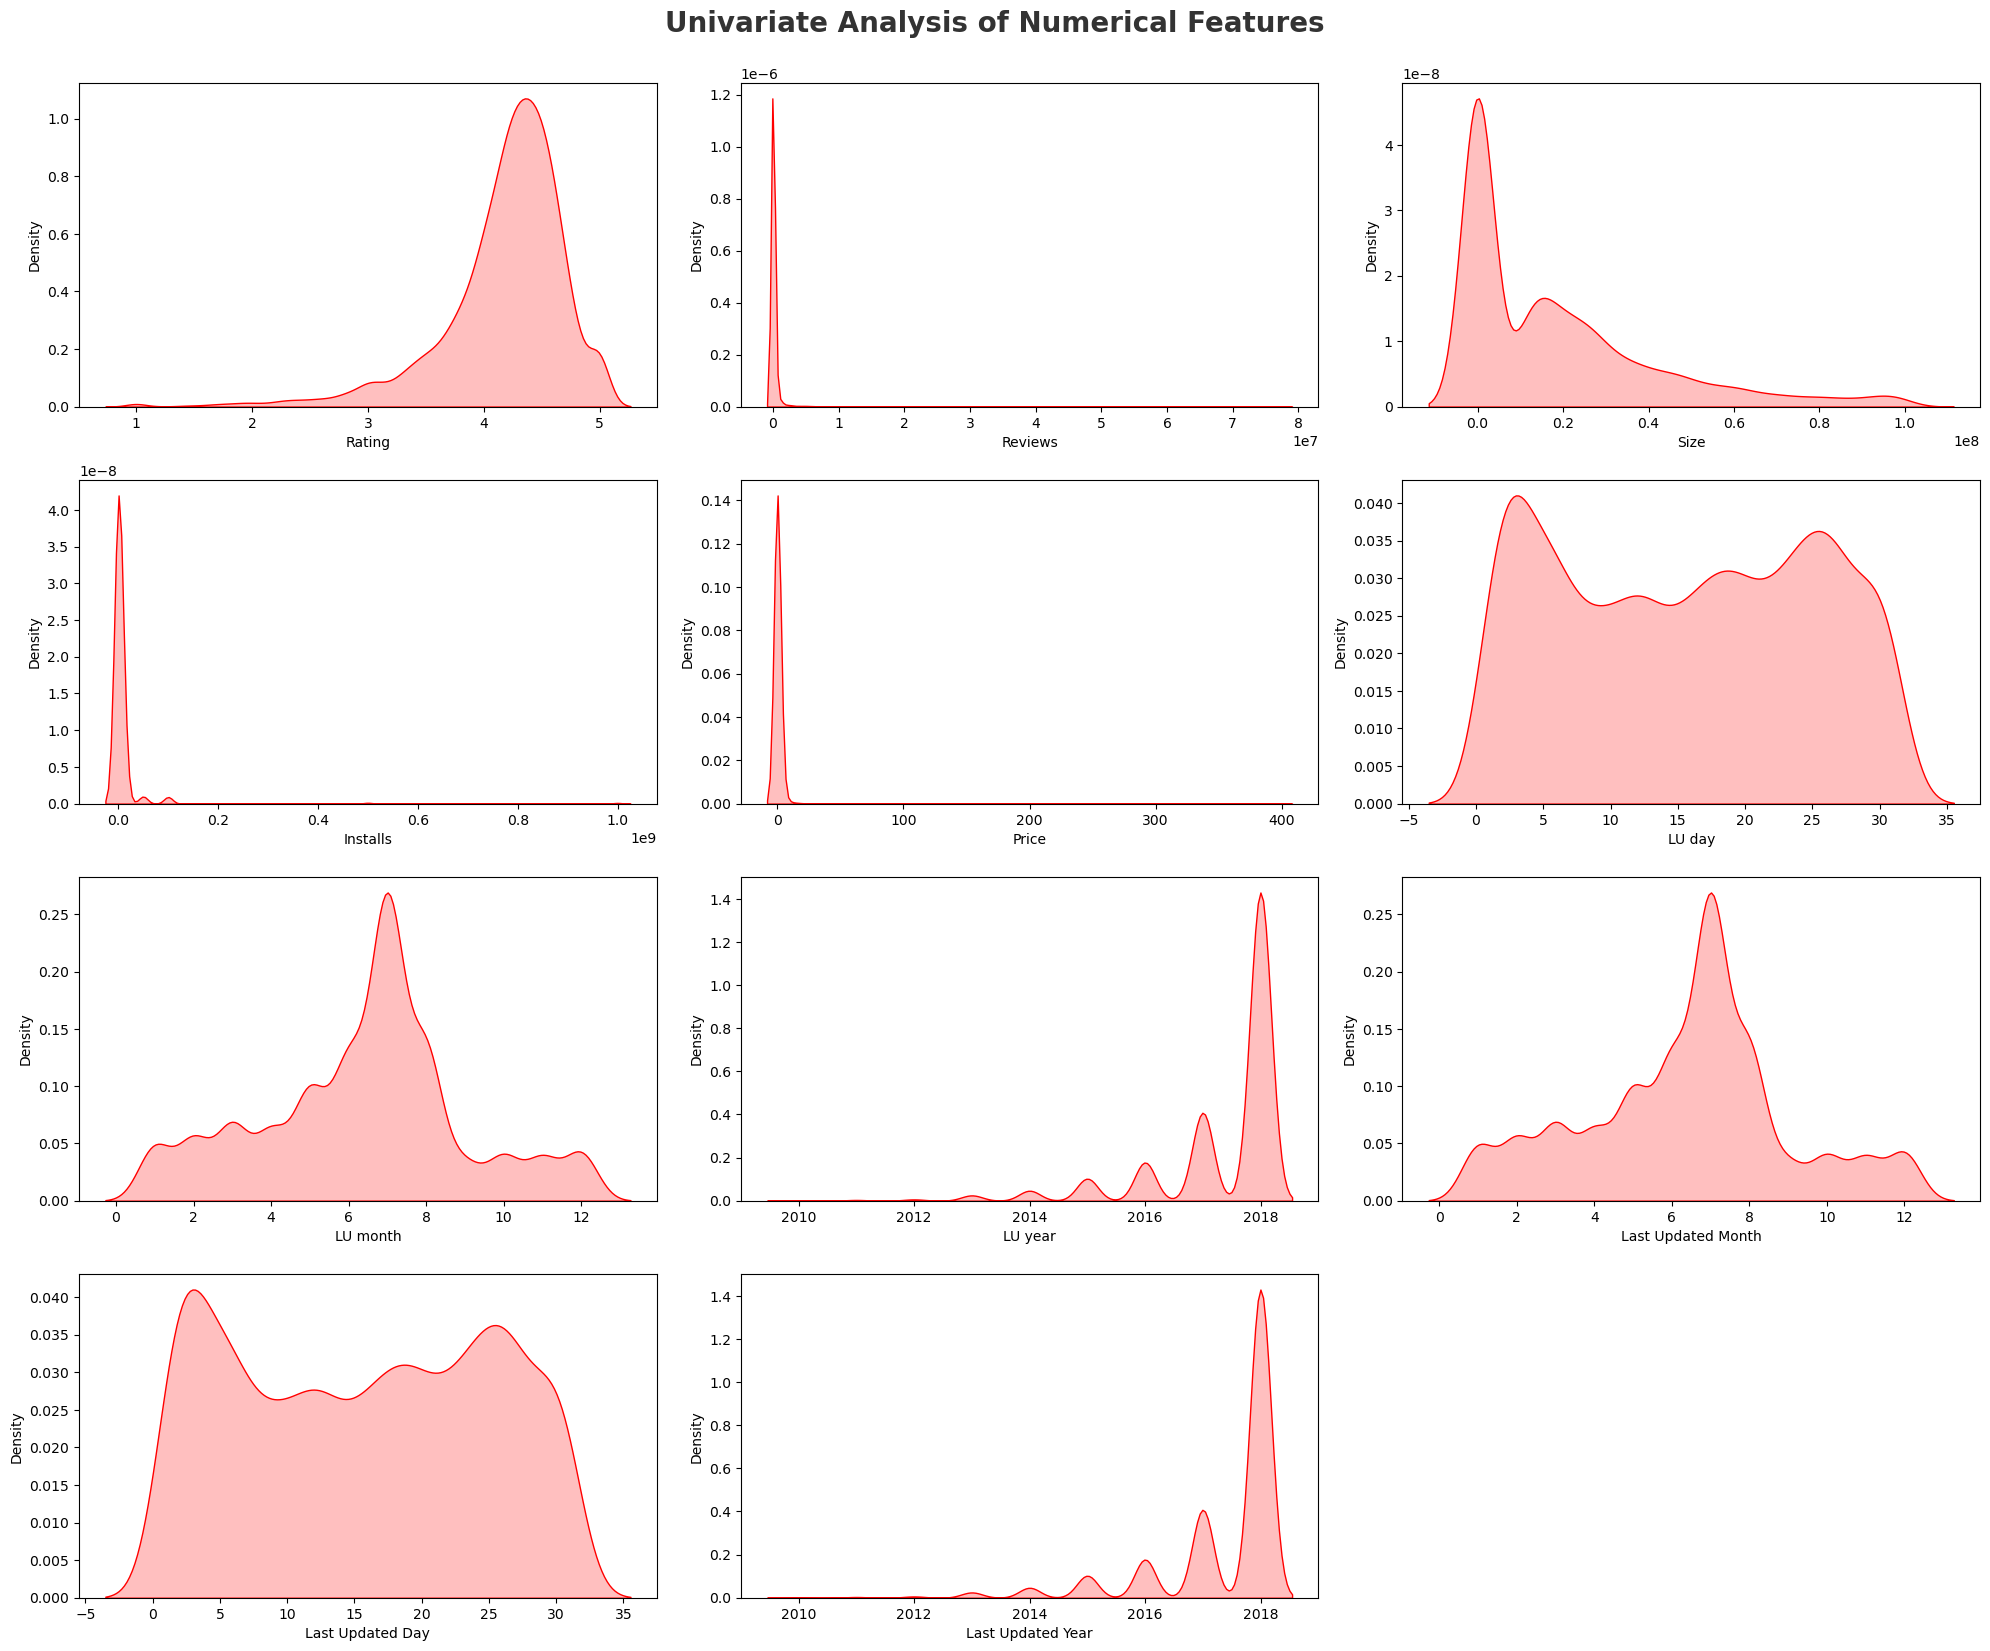

In [63]:
# Proportion of Count Data on Categorical Columns
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(20,20))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold',alpha=0.8,y=1.)

for i in range(0,len(numeric_features)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=df_copy[numeric_features[i]],shade=True,color='r')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

### Obeservation
rating and year is left skewed, while Reviews, Size, Installs and Price are right skewed.


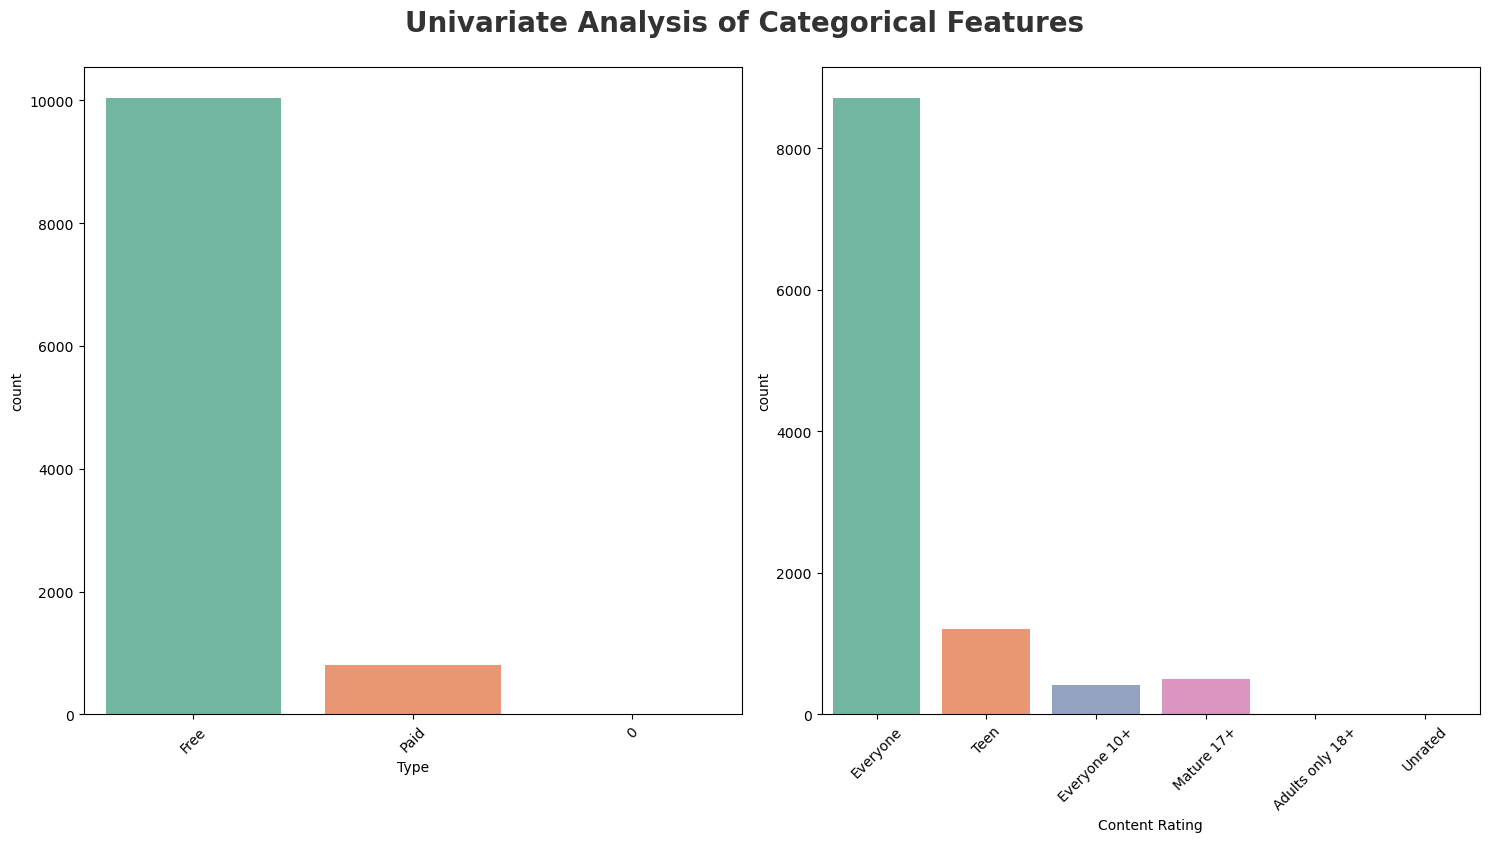

In [64]:
# categorical columns
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20,fontweight='bold',alpha=0.8,y=1.)
category = ['Type','Content Rating']

for i,data in enumerate(category):
    plt.subplot(2,2,i+1)
    sns.countplot(x=df[data],palette="Set2")
    plt.xlabel(data)
    plt.xticks(rotation=45)
    plt.tight_layout()

<Axes: ylabel='count'>

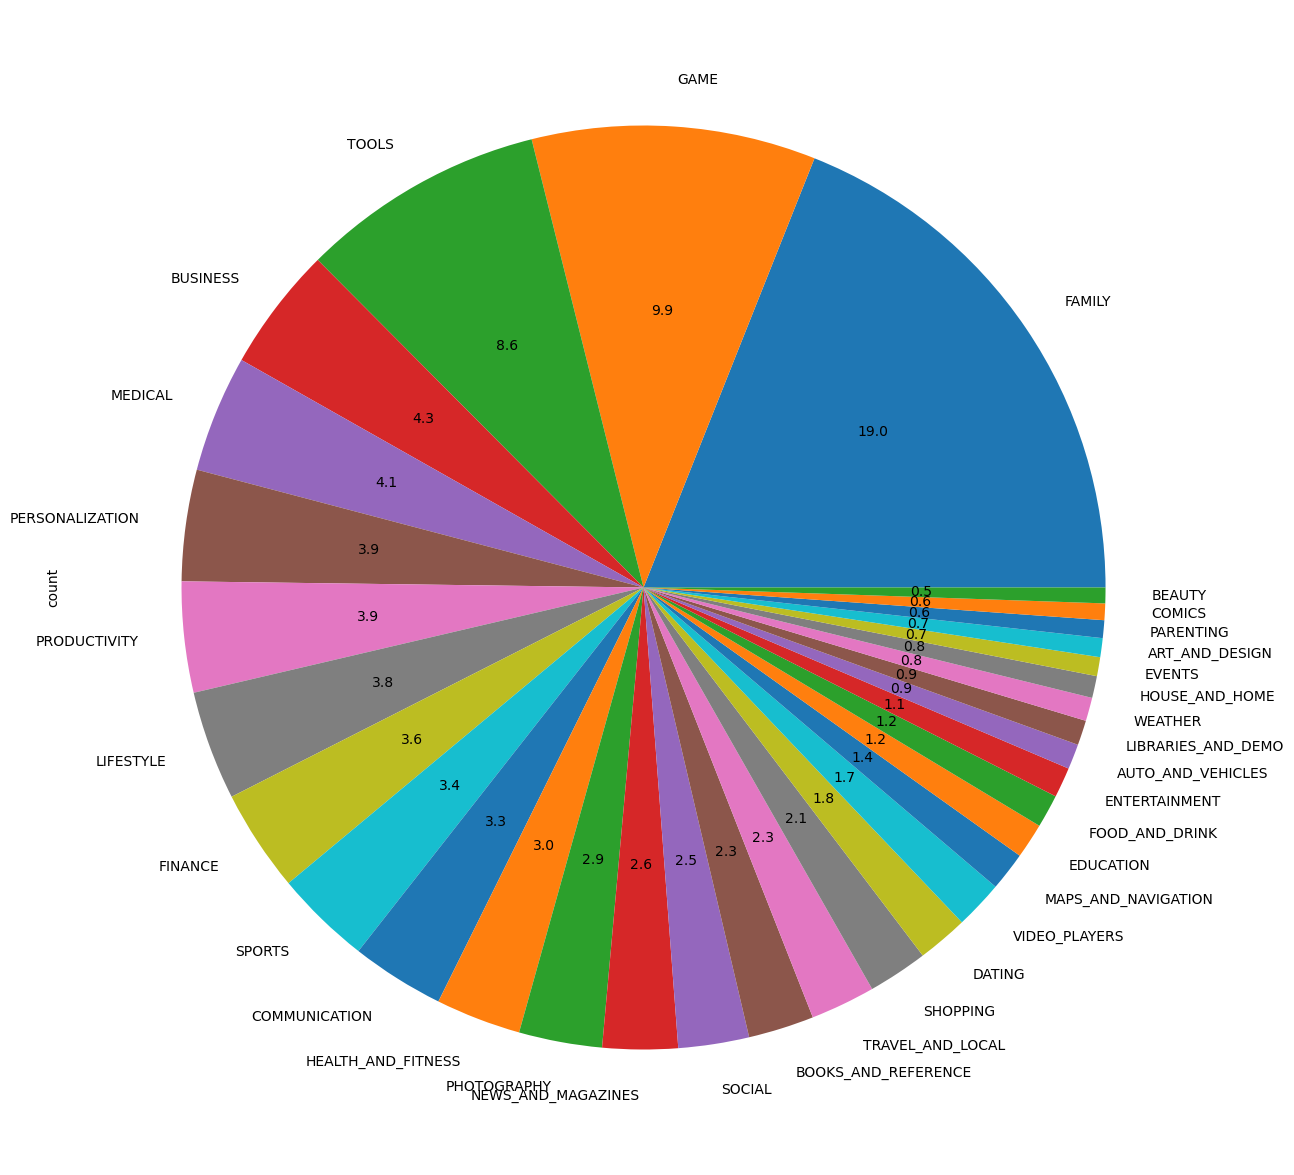

In [65]:
### Which is more popular category ?

df_copy['Category'].value_counts().plot.pie(y=df_copy['Category'],figsize=(15,15),autopct='%1.1f')


In [66]:
category = pd.DataFrame(df['Category'].value_counts())

In [67]:
category.rename(columns = {'Category':'Count'},inplace=True)

In [68]:
category

,count
Category,
FAMILY,1972
GAME,1144
TOOLS,843
MEDICAL,463
BUSINESS,460
PRODUCTIVITY,424
PERSONALIZATION,392
COMMUNICATION,387
SPORTS,384


In [69]:
category.index

Index(['FAMILY', 'GAME', 'TOOLS', 'MEDICAL', 'BUSINESS', 'PRODUCTIVITY',
       'PERSONALIZATION', 'COMMUNICATION', 'SPORTS', 'LIFESTYLE', 'FINANCE',
       'HEALTH_AND_FITNESS', 'PHOTOGRAPHY', 'SOCIAL', 'NEWS_AND_MAGAZINES',
       'SHOPPING', 'TRAVEL_AND_LOCAL', 'DATING', 'BOOKS_AND_REFERENCE',
       'VIDEO_PLAYERS', 'EDUCATION', 'ENTERTAINMENT', 'MAPS_AND_NAVIGATION',
       'FOOD_AND_DRINK', 'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO',
       'AUTO_AND_VEHICLES', 'WEATHER', 'ART_AND_DESIGN', 'EVENTS', 'PARENTING',
       'COMICS', 'BEAUTY', '1.9'],
      dtype='object', name='Category')

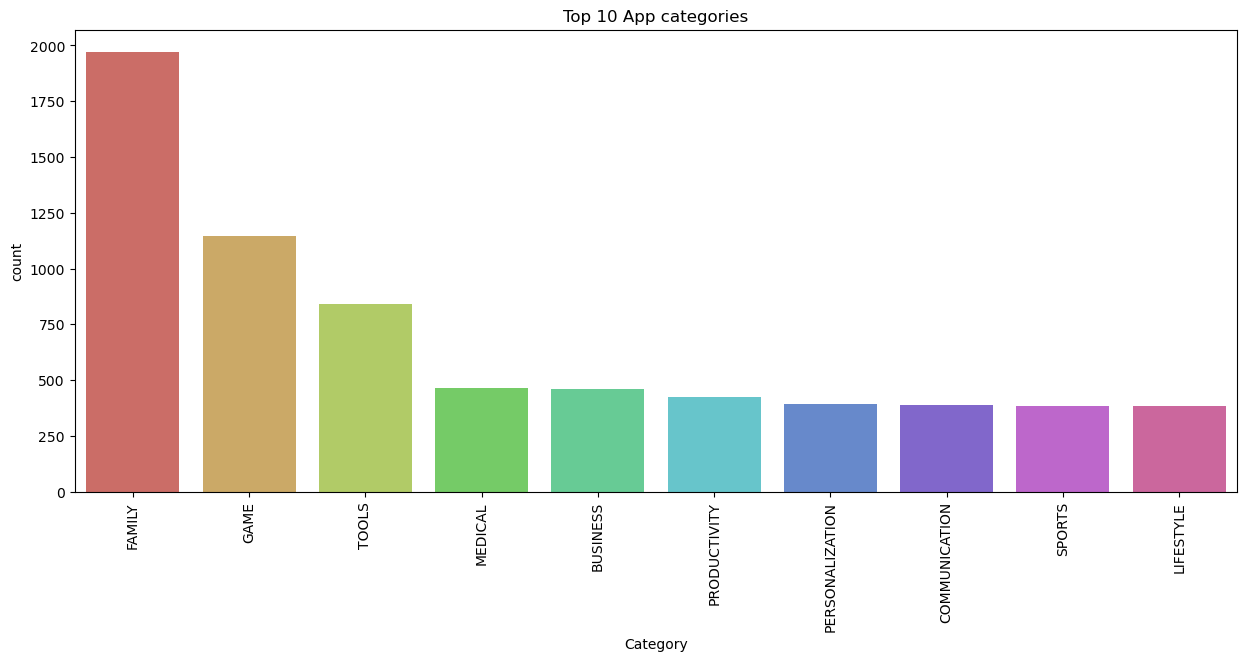

In [70]:
plt.figure(figsize=(15,6))
sns.barplot(x=category.index[:10],y='count',data = category[:10],palette='hls')
plt.title('Top 10 App categories')
plt.xticks(rotation=90)
plt.show()